### Gradient Descent

#### Let's plot weights vs loss curve and observe the nature

#### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

#### Loading the data

In [2]:
df = pd.read_csv("pizza.txt" ,sep = "\s+")

In [3]:
df.head(n=3)

,Reservations,Pizzas
0,13,33
1,2,16
2,14,32


In [4]:
X = df["Reservations"]
y = df["Pizzas"]

#### Generating the functions from previous chapter

In [5]:
def func_predict(X,w,b=0):
    return (X*w + b)

In [6]:
def func_loss(X,y,w,b=0):
    sq_err = (func_predict(X,w,b) - y)**2
    return np.average(sq_err)
    

#### Generating some random weights and loss values to display the nature of weights vs loss curve

In [7]:
weights = np.linspace(-1,5,200) # 200 equally spaced points btwn -1 and 5
loss = [func_loss(X,y,w) for w in weights] # using list comprehension to generate the loss list 

#### Plotting the graph

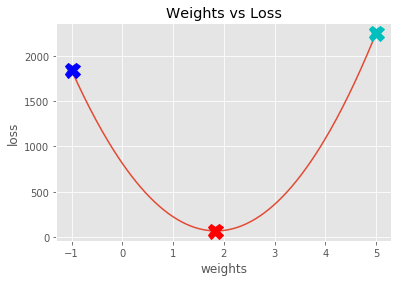

In [8]:
# Some random variables to display few points on the curve depecting someone who intends to descend down
min_wt_idx = np.argmin(loss)
strt_wt = weights[0]
strt_loss = loss[0]
end_wt = weights[-1]
end_loss = loss[-1]
antr_loss = loss[0]

# Plot starts
plt.plot(weights,loss)
plt.xlabel("weights")
plt.ylabel("loss")
plt.title ("Weights vs Loss")
plt.plot(weights[min_wt_idx], loss[min_wt_idx], "rX", markersize=15)
plt.plot(strt_wt, strt_loss, "bX", markersize=15)
plt.plot(end_wt, end_loss, "cX", markersize=15)
plt.show()

#### Observations about of the loss curve: (and these are some prereqs for gradient descent)
- The graph is a convex function
- The graph is continious
- The graph has a global minima
- Both the blue and green points (these are 2 hypothetical people) needs to descend to the red points.

From our previous lesson: (for the training phase)

$loss = (predicted - actual) ** 2/m$ (`m`: # of observations in training phase)

- As can be observed from the curve, **the minimum value of loss is our point of descent**.
- For finding a global minima:
>- we need to take the derivative of the loss function 
 - it should be partial derivatives wrt weights (w) and bias(b) to arrive at the final approximate function of the loss curve.
 
Therefore, the loss function can be expressed as:

*loss(L)* =$1/m$ $\sum_{i=1}^{m}$ $(( X_iw + b)- y_i)^2$

**Logic for algorithm**:
- As we have 2 variables (w and b), we need to find the partial derv. of loss function wrt each one
- Determine the next set of w and b (using the above values) 
- Continue till the train function converges

On differentiating $L$, wrt to $w$ and $b$, we get:
>- $\partial$L/$\partial$w = $2/m$$\sum_{i=1}^{m}$$X_i( X_iw + b)- y_i)$
- $\partial$L/$\partial$b = $2/m$$\sum_{i=1}^{m}$$( X_iw + b)- y_i)$

#### Let's code up the Gradient Descent function real quick

In [9]:
def func_gradient(X,y,w,b):
    w_grad = 2 * np.average(X * (func_predict(X, w, b) - y))
    b_grad = 2 * np.average(func_predict(X, w, b) - y)
    return (w_grad,b_grad)

#### Let's code up the final train function

In [10]:
def func_train_gd(X,y,iterations,lr):
    w = 0
    b = 0
    for seq,i in enumerate(range(iterations)):
        print(f"Iteration:{seq},loss:{func_loss(X,y,w,b)}")
        w_gd, b_gd = func_gradient(X,y,w,b)
        w -=w_gd*lr
        b -=b_gd*lr
        
    return w,b    
        

In [11]:
weight,bias  = func_train_gd(X,y,20000,0.001)

Iteration:0,loss:812.8666666666667
Iteration:1,loss:302.57695615644445
Iteration:2,loss:141.98409032672075
Iteration:3,loss:91.42137662111031
Iteration:4,loss:75.47905765224317
Iteration:5,loss:70.42988348520574
Iteration:6,loss:68.80821027087441
Iteration:7,loss:68.26501573143898
Iteration:8,loss:68.06119337270614
Iteration:9,loss:67.96418751616304
Iteration:10,loss:67.90082580727031
Iteration:11,loss:67.84808494502518
Iteration:12,loss:67.79872074202484
Iteration:13,loss:67.75045381896952
Iteration:14,loss:67.70256694514084
Iteration:15,loss:67.65483441099774
Iteration:16,loss:67.60718516137254
Iteration:17,loss:67.55959680225291
Iteration:18,loss:67.51206225062072
Iteration:19,loss:67.46457924101391
Iteration:20,loss:67.41714702382623
Iteration:21,loss:67.36976532644579
Iteration:22,loss:67.32243402638338
Iteration:23,loss:67.27515304842406
Iteration:24,loss:67.22792233226649
Iteration:25,loss:67.18074182234062
Iteration:26,loss:67.13361146460416
Iteration:27,loss:67.08653120553426


Iteration:285,loss:56.46944837661351
Iteration:286,loss:56.43370389642618
Iteration:287,loss:56.39799741186202
Iteration:288,loss:56.36232888253252
Iteration:289,loss:56.32669826809202
Iteration:290,loss:56.29110552823781
Iteration:291,loss:56.255550622710004
Iteration:292,loss:56.220033511291575
Iteration:293,loss:56.1845541538081
Iteration:294,loss:56.149112510127985
Iteration:295,loss:56.113708540162285
Iteration:296,loss:56.0783422038646
Iteration:297,loss:56.0430134612312
Iteration:298,loss:56.00772227230072
Iteration:299,loss:55.97246859715446
Iteration:300,loss:55.93725239591604
Iteration:301,loss:55.902073628751474
Iteration:302,loss:55.86693225586912
Iteration:303,loss:55.83182823751973
Iteration:304,loss:55.796761533996154
Iteration:305,loss:55.761732105633534
Iteration:306,loss:55.72673991280923
Iteration:307,loss:55.69178491594256
Iteration:308,loss:55.65686707549505
Iteration:309,loss:55.62198635197024
Iteration:310,loss:55.587142705913635
Iteration:311,loss:55.55233609791

Iteration:564,loss:47.8356403888586
Iteration:565,loss:47.80907346316578
Iteration:566,loss:47.78253477755064
Iteration:567,loss:47.75602430199458
Iteration:568,loss:47.729542006510904
Iteration:569,loss:47.7030878611448
Iteration:570,loss:47.676661835973306
Iteration:571,loss:47.65026390110523
Iteration:572,loss:47.62389402668119
Iteration:573,loss:47.5975521828735
Iteration:574,loss:47.57123833988625
Iteration:575,loss:47.54495246795514
Iteration:576,loss:47.51869453734755
Iteration:577,loss:47.49246451836239
Iteration:578,loss:47.46626238133029
Iteration:579,loss:47.44008809661325
Iteration:580,loss:47.41394163460488
Iteration:581,loss:47.38782296573025
Iteration:582,loss:47.36173206044584
Iteration:583,loss:47.33566888923948
Iteration:584,loss:47.309633422630526
Iteration:585,loss:47.28362563116955
Iteration:586,loss:47.257645485438424
Iteration:587,loss:47.231692956050374
Iteration:588,loss:47.20576801364976
Iteration:589,loss:47.17987062891224
Iteration:590,loss:47.15400077254458

Iteration:818,loss:41.91913206207697
Iteration:819,loss:41.898854259059
Iteration:820,loss:41.8785980109149
Iteration:821,loss:41.858363294732285
Iteration:822,loss:41.83815008762319
Iteration:823,loss:41.81795836672386
Iteration:824,loss:41.79778810919496
Iteration:825,loss:41.77763929222135
Iteration:826,loss:41.757511893012186
Iteration:827,loss:41.737405888800836
Iteration:828,loss:41.71732125684488
Iteration:829,loss:41.69725797442609
Iteration:830,loss:41.67721601885031
Iteration:831,loss:41.657195367447585
Iteration:832,loss:41.63719599757202
Iteration:833,loss:41.617217886601836
Iteration:834,loss:41.59726101193923
Iteration:835,loss:41.57732535101047
Iteration:836,loss:41.55741088126583
Iteration:837,loss:41.5375175801795
Iteration:838,loss:41.51764542524965
Iteration:839,loss:41.49779439399838
Iteration:840,loss:41.47796446397165
Iteration:841,loss:41.45815561273934
Iteration:842,loss:41.43836781789511
Iteration:843,loss:41.41860105705644
Iteration:844,loss:41.39885530786471


Iteration:1079,loss:37.29522659628797
Iteration:1080,loss:37.27986390656066
Iteration:1081,loss:37.264517547046204
Iteration:1082,loss:37.249187500385915
Iteration:1083,loss:37.23387374923959
Iteration:1084,loss:37.21857627628547
Iteration:1085,loss:37.203295064220136
Iteration:1086,loss:37.18803009575864
Iteration:1087,loss:37.17278135363435
Iteration:1088,loss:37.15754882059904
Iteration:1089,loss:37.14233247942278
Iteration:1090,loss:37.127132312893984
Iteration:1091,loss:37.11194830381931
Iteration:1092,loss:37.096780435023774
Iteration:1093,loss:37.081628689350545
Iteration:1094,loss:37.06649304966113
Iteration:1095,loss:37.051373498835204
Iteration:1096,loss:37.036270019770654
Iteration:1097,loss:37.02118259538348
Iteration:1098,loss:37.00611120860799
Iteration:1099,loss:36.9910558423965
Iteration:1100,loss:36.97601647971948
Iteration:1101,loss:36.96099310356553
Iteration:1102,loss:36.94598569694129
Iteration:1103,loss:36.930994242871535
Iteration:1104,loss:36.916018724398995
Ite

Iteration:1335,loss:33.850485010343036
Iteration:1336,loss:33.838784007749524
Iteration:1337,loss:33.82709544307321
Iteration:1338,loss:33.815419303092874
Iteration:1339,loss:33.803755574601304
Iteration:1340,loss:33.79210424440539
Iteration:1341,loss:33.78046529932595
Iteration:1342,loss:33.76883872619791
Iteration:1343,loss:33.75722451187015
Iteration:1344,loss:33.7456226432055
Iteration:1345,loss:33.73403310708079
Iteration:1346,loss:33.722455890386826
Iteration:1347,loss:33.710890980028275
Iteration:1348,loss:33.69933836292377
Iteration:1349,loss:33.687798026005865
Iteration:1350,loss:33.67626995622097
Iteration:1351,loss:33.664754140529354
Iteration:1352,loss:33.653250565905225
Iteration:1353,loss:33.64175921933655
Iteration:1354,loss:33.63028008782521
Iteration:1355,loss:33.61881315838681
Iteration:1356,loss:33.60735841805082
Iteration:1357,loss:33.59591585386049
Iteration:1358,loss:33.58448545287285
Iteration:1359,loss:33.57306720215866
Iteration:1360,loss:33.56166108880243
Iter

Iteration:1597,loss:31.17346478918851
Iteration:1598,loss:31.16460940222571
Iteration:1599,loss:31.155763428351136
Iteration:1600,loss:31.146926857558892
Iteration:1601,loss:31.138099679853713
Iteration:1602,loss:31.129281885250908
Iteration:1603,loss:31.12047346377648
Iteration:1604,loss:31.111674405466946
Iteration:1605,loss:31.10288470036952
Iteration:1606,loss:31.094104338541875
Iteration:1607,loss:31.085333310052373
Iteration:1608,loss:31.076571604979826
Iteration:1609,loss:31.06781921341366
Iteration:1610,loss:31.05907612545381
Iteration:1611,loss:31.05034233121075
Iteration:1612,loss:31.041617820805453
Iteration:1613,loss:31.032902584369392
Iteration:1614,loss:31.024196612044534
Iteration:1615,loss:31.01549989398332
Iteration:1616,loss:31.00681242034869
Iteration:1617,loss:30.998134181313976
Iteration:1618,loss:30.989465167063038
Iteration:1619,loss:30.980805367790083
Iteration:1620,loss:30.97215477369983
Iteration:1621,loss:30.963513375007338
Iteration:1622,loss:30.954881161938

Iteration:1873,loss:29.054300488812395
Iteration:1874,loss:29.047697728486312
Iteration:1875,loss:29.041101986754192
Iteration:1876,loss:29.034513256155417
Iteration:1877,loss:29.027931529237332
Iteration:1878,loss:29.021356798555143
Iteration:1879,loss:29.01478905667202
Iteration:1880,loss:29.008228296158997
Iteration:1881,loss:29.00167450959504
Iteration:1882,loss:28.995127689567006
Iteration:1883,loss:28.988587828669573
Iteration:1884,loss:28.98205491950536
Iteration:1885,loss:28.975528954684833
Iteration:1886,loss:28.969009926826274
Iteration:1887,loss:28.962497828555858
Iteration:1888,loss:28.95599265250758
Iteration:1889,loss:28.94949439132326
Iteration:1890,loss:28.943003037652545
Iteration:1891,loss:28.93651858415289
Iteration:1892,loss:28.930041023489558
Iteration:1893,loss:28.923570348335627
Iteration:1894,loss:28.917106551371944
Iteration:1895,loss:28.910649625287125
Iteration:1896,loss:28.904199562777567
Iteration:1897,loss:28.897756356547465
Iteration:1898,loss:28.89131999

Iteration:2137,loss:27.533695685143222
Iteration:2138,loss:27.52870929542326
Iteration:2139,loss:27.52372820612963
Iteration:2140,loss:27.51875241162811
Iteration:2141,loss:27.51378190629045
Iteration:2142,loss:27.508816684494416
Iteration:2143,loss:27.503856740623647
Iteration:2144,loss:27.498902069067867
Iteration:2145,loss:27.493952664222697
Iteration:2146,loss:27.489008520489758
Iteration:2147,loss:27.48406963227657
Iteration:2148,loss:27.479135993996646
Iteration:2149,loss:27.474207600069423
Iteration:2150,loss:27.469284444920252
Iteration:2151,loss:27.46436652298043
Iteration:2152,loss:27.459453828687167
Iteration:2153,loss:27.454546356483583
Iteration:2154,loss:27.449644100818706
Iteration:2155,loss:27.444747056147488
Iteration:2156,loss:27.439855216930706
Iteration:2157,loss:27.434968577635104
Iteration:2158,loss:27.430087132733288
Iteration:2159,loss:27.425210876703705
Iteration:2160,loss:27.420339804030686
Iteration:2161,loss:27.41547390920447
Iteration:2162,loss:27.410613186

Iteration:2383,loss:26.453810517540514
Iteration:2384,loss:26.449972022815135
Iteration:2385,loss:26.446137608328115
Iteration:2386,loss:26.442307269742237
Iteration:2387,loss:26.438481002724927
Iteration:2388,loss:26.434658802948185
Iteration:2389,loss:26.430840666088578
Iteration:2390,loss:26.427026587827378
Iteration:2391,loss:26.42321656385036
Iteration:2392,loss:26.41941058984789
Iteration:2393,loss:26.41560866151493
Iteration:2394,loss:26.411810774551043
Iteration:2395,loss:26.40801692466031
Iteration:2396,loss:26.404227107551428
Iteration:2397,loss:26.400441318937634
Iteration:2398,loss:26.396659554536722
Iteration:2399,loss:26.392881810071035
Iteration:2400,loss:26.389108081267462
Iteration:2401,loss:26.385338363857446
Iteration:2402,loss:26.38157265357697
Iteration:2403,loss:26.37781094616655
Iteration:2404,loss:26.374053237371175
Iteration:2405,loss:26.370299522940424
Iteration:2406,loss:26.366549798628398
Iteration:2407,loss:26.362804060193646
Iteration:2408,loss:26.35906230

Iteration:2610,loss:25.679264423866492
Iteration:2611,loss:25.676249255186033
Iteration:2612,loss:25.673237291565837
Iteration:2613,loss:25.670228529599
Iteration:2614,loss:25.667222965882196
Iteration:2615,loss:25.664220597015795
Iteration:2616,loss:25.661221419603724
Iteration:2617,loss:25.658225430253538
Iteration:2618,loss:25.655232625576396
Iteration:2619,loss:25.65224300218704
Iteration:2620,loss:25.64925655670385
Iteration:2621,loss:25.64627328574878
Iteration:2622,loss:25.64329318594736
Iteration:2623,loss:25.640316253928713
Iteration:2624,loss:25.637342486325565
Iteration:2625,loss:25.634371879774225
Iteration:2626,loss:25.631404430914543
Iteration:2627,loss:25.628440136389983
Iteration:2628,loss:25.62547899284751
Iteration:2629,loss:25.622520996937737
Iteration:2630,loss:25.61956614531478
Iteration:2631,loss:25.616614434636347
Iteration:2632,loss:25.613665861563643
Iteration:2633,loss:25.6107204227615
Iteration:2634,loss:25.60777811489823
Iteration:2635,loss:25.60483893464572

Iteration:2858,loss:25.021640123412716
Iteration:2859,loss:25.0193239953946
Iteration:2860,loss:25.017010329371374
Iteration:2861,loss:25.014699122725986
Iteration:2862,loss:25.012390372844163
Iteration:2863,loss:25.01008407711443
Iteration:2864,loss:25.007780232928077
Iteration:2865,loss:25.005478837679128
Iteration:2866,loss:25.00317988876446
Iteration:2867,loss:25.00088338358365
Iteration:2868,loss:24.998589319539075
Iteration:2869,loss:24.996297694035835
Iteration:2870,loss:24.99400850448185
Iteration:2871,loss:24.991721748287706
Iteration:2872,loss:24.989437422866846
Iteration:2873,loss:24.98715552563537
Iteration:2874,loss:24.984876054012172
Iteration:2875,loss:24.982599005418916
Iteration:2876,loss:24.98032437727994
Iteration:2877,loss:24.978052167022344
Iteration:2878,loss:24.97578237207599
Iteration:2879,loss:24.973514989873465
Iteration:2880,loss:24.971250017850036
Iteration:2881,loss:24.968987453443766
Iteration:2882,loss:24.966727294095406
Iteration:2883,loss:24.96446953724

Iteration:3084,loss:24.556104258748594
Iteration:3085,loss:24.554282985465857
Iteration:3086,loss:24.55246364815794
Iteration:3087,loss:24.550646244766938
Iteration:3088,loss:24.548830773237135
Iteration:3089,loss:24.547017231514992
Iteration:3090,loss:24.545205617549186
Iteration:3091,loss:24.543395929290543
Iteration:3092,loss:24.541588164692072
Iteration:3093,loss:24.539782321708984
Iteration:3094,loss:24.53797839829862
Iteration:3095,loss:24.53617639242053
Iteration:3096,loss:24.534376302036392
Iteration:3097,loss:24.532578125110103
Iteration:3098,loss:24.53078185960771
Iteration:3099,loss:24.528987503497365
Iteration:3100,loss:24.52719505474945
Iteration:3101,loss:24.525404511336504
Iteration:3102,loss:24.523615871233158
Iteration:3103,loss:24.52182913241624
Iteration:3104,loss:24.520044292864732
Iteration:3105,loss:24.51826135055976
Iteration:3106,loss:24.51648030348459
Iteration:3107,loss:24.51470114962463
Iteration:3108,loss:24.51292388696741
Iteration:3109,loss:24.511148513502

Iteration:3305,loss:24.19721657051754
Iteration:3306,loss:24.19577678722403
Iteration:3307,loss:24.194338534389562
Iteration:3308,loss:24.19290181038732
Iteration:3309,loss:24.191466613592173
Iteration:3310,loss:24.19003294238074
Iteration:3311,loss:24.188600795131343
Iteration:3312,loss:24.187170170224043
Iteration:3313,loss:24.18574106604063
Iteration:3314,loss:24.184313480964615
Iteration:3315,loss:24.182887413381202
Iteration:3316,loss:24.181462861677343
Iteration:3317,loss:24.18003982424169
Iteration:3318,loss:24.17861829946461
Iteration:3319,loss:24.17719828573816
Iteration:3320,loss:24.17577978145615
Iteration:3321,loss:24.174362785014036
Iteration:3322,loss:24.17294729480906
Iteration:3323,loss:24.171533309240104
Iteration:3324,loss:24.17012082670777
Iteration:3325,loss:24.168709845614366
Iteration:3326,loss:24.167300364363882
Iteration:3327,loss:24.165892381362042
Iteration:3328,loss:24.16448589501623
Iteration:3329,loss:24.163080903735512
Iteration:3330,loss:24.16167740593068

Iteration:3595,loss:23.837738966003247
Iteration:3596,loss:23.836681299767417
Iteration:3597,loss:23.835624757808336
Iteration:3598,loss:23.834569338930912
Iteration:3599,loss:23.83351504194134
Iteration:3600,loss:23.832461865647076
Iteration:3601,loss:23.831409808856844
Iteration:3602,loss:23.83035887038061
Iteration:3603,loss:23.829309049029675
Iteration:3604,loss:23.828260343616527
Iteration:3605,loss:23.827212752954964
Iteration:3606,loss:23.82616627586002
Iteration:3607,loss:23.825120911148
Iteration:3608,loss:23.82407665763646
Iteration:3609,loss:23.82303351414422
Iteration:3610,loss:23.821991479491352
Iteration:3611,loss:23.820950552499188
Iteration:3612,loss:23.819910731990312
Iteration:3613,loss:23.818872016788543
Iteration:3614,loss:23.817834405718962
Iteration:3615,loss:23.816797897607916
Iteration:3616,loss:23.815762491282978
Iteration:3617,loss:23.814728185572964
Iteration:3618,loss:23.81369497930795
Iteration:3619,loss:23.812662871319258
Iteration:3620,loss:23.81163186043

Iteration:3817,loss:23.628486349120287
Iteration:3818,loss:23.627651113971343
Iteration:3819,loss:23.626816766659594
Iteration:3820,loss:23.625983306241338
Iteration:3821,loss:23.62515073177381
Iteration:3822,loss:23.624319042315236
Iteration:3823,loss:23.623488236924903
Iteration:3824,loss:23.622658314663042
Iteration:3825,loss:23.621829274590926
Iteration:3826,loss:23.62100111577079
Iteration:3827,loss:23.620173837265902
Iteration:3828,loss:23.619347438140473
Iteration:3829,loss:23.618521917459773
Iteration:3830,loss:23.617697274290013
Iteration:3831,loss:23.616873507698426
Iteration:3832,loss:23.616050616753228
Iteration:3833,loss:23.615228600523633
Iteration:3834,loss:23.614407458079818
Iteration:3835,loss:23.613587188492982
Iteration:3836,loss:23.6127677908353
Iteration:3837,loss:23.611949264179916
Iteration:3838,loss:23.61113160760099
Iteration:3839,loss:23.610314820173624
Iteration:3840,loss:23.60949890097395
Iteration:3841,loss:23.608683849079046
Iteration:3842,loss:23.60786966

Iteration:4066,loss:23.445675534705053
Iteration:4067,loss:23.44503462356862
Iteration:4068,loss:23.444394393707103
Iteration:4069,loss:23.443754844396334
Iteration:4070,loss:23.443115974912907
Iteration:4071,loss:23.442477784534166
Iteration:4072,loss:23.441840272538244
Iteration:4073,loss:23.44120343820401
Iteration:4074,loss:23.440567280811155
Iteration:4075,loss:23.43993179964011
Iteration:4076,loss:23.439296993972032
Iteration:4077,loss:23.438662863088926
Iteration:4078,loss:23.43802940627345
Iteration:4079,loss:23.43739662280912
Iteration:4080,loss:23.436764511980176
Iteration:4081,loss:23.436133073071623
Iteration:4082,loss:23.435502305369194
Iteration:4083,loss:23.43487220815945
Iteration:4084,loss:23.434242780729654
Iteration:4085,loss:23.433614022367838
Iteration:4086,loss:23.432985932362815
Iteration:4087,loss:23.43235851000412
Iteration:4088,loss:23.431731754582074
Iteration:4089,loss:23.431105665387715
Iteration:4090,loss:23.43048024171288
Iteration:4091,loss:23.4298554828

Iteration:4343,loss:23.29182254235225
Iteration:4344,loss:23.291345173678582
Iteration:4345,loss:23.2908683124377
Iteration:4346,loss:23.29039195809016
Iteration:4347,loss:23.28991611009719
Iteration:4348,loss:23.28944076792052
Iteration:4349,loss:23.288965931022485
Iteration:4350,loss:23.288491598866
Iteration:4351,loss:23.28801777091452
Iteration:4352,loss:23.287544446632076
Iteration:4353,loss:23.287071625483293
Iteration:4354,loss:23.28659930693335
Iteration:4355,loss:23.286127490448
Iteration:4356,loss:23.285656175493532
Iteration:4357,loss:23.28518536153688
Iteration:4358,loss:23.28471504804543
Iteration:4359,loss:23.284245234487244
Iteration:4360,loss:23.283775920330893
Iteration:4361,loss:23.28330710504552
Iteration:4362,loss:23.28283878810083
Iteration:4363,loss:23.28237096896711
Iteration:4364,loss:23.281903647115207
Iteration:4365,loss:23.281436822016495
Iteration:4366,loss:23.280970493142934
Iteration:4367,loss:23.28050465996707
Iteration:4368,loss:23.280039321961983
Iterat

Iteration:4605,loss:23.182607491580782
Iteration:4606,loss:23.182246216186183
Iteration:4607,loss:23.181885324819653
Iteration:4608,loss:23.181524817072994
Iteration:4609,loss:23.181164692538392
Iteration:4610,loss:23.180804950808525
Iteration:4611,loss:23.180445591476495
Iteration:4612,loss:23.180086614135785
Iteration:4613,loss:23.17972801838037
Iteration:4614,loss:23.179369803804605
Iteration:4615,loss:23.179011970003337
Iteration:4616,loss:23.178654516571815
Iteration:4617,loss:23.178297443105684
Iteration:4618,loss:23.177940749201046
Iteration:4619,loss:23.177584434454488
Iteration:4620,loss:23.1772284984629
Iteration:4621,loss:23.176872940823742
Iteration:4622,loss:23.176517761134786
Iteration:4623,loss:23.17616295899429
Iteration:4624,loss:23.175808534000943
Iteration:4625,loss:23.175454485753832
Iteration:4626,loss:23.175100813852477
Iteration:4627,loss:23.174747517896854
Iteration:4628,loss:23.17439459748733
Iteration:4629,loss:23.174042052224703
Iteration:4630,loss:23.1736898

Iteration:4861,loss:23.101599517206527
Iteration:4862,loss:23.101324351567953
Iteration:4863,loss:23.101049478424596
Iteration:4864,loss:23.10077489746555
Iteration:4865,loss:23.10050060838024
Iteration:4866,loss:23.100226610858396
Iteration:4867,loss:23.099952904590108
Iteration:4868,loss:23.09967948926575
Iteration:4869,loss:23.099406364576087
Iteration:4870,loss:23.09913353021216
Iteration:4871,loss:23.098860985865382
Iteration:4872,loss:23.098588731227434
Iteration:4873,loss:23.098316765990397
Iteration:4874,loss:23.098045089846625
Iteration:4875,loss:23.097773702488816
Iteration:4876,loss:23.09750260361002
Iteration:4877,loss:23.097231792903564
Iteration:4878,loss:23.09696127006314
Iteration:4879,loss:23.09669103478274
Iteration:4880,loss:23.096421086756717
Iteration:4881,loss:23.0961514256797
Iteration:4882,loss:23.095882051246686
Iteration:4883,loss:23.09561296315297
Iteration:4884,loss:23.09534416109418
Iteration:4885,loss:23.095075644766272
Iteration:4886,loss:23.0948074138655

Iteration:5100,loss:23.043496918379063
Iteration:5101,loss:23.043283514568834
Iteration:5102,loss:23.043070337602337
Iteration:5103,loss:23.042857387238424
Iteration:5104,loss:23.04264466323621
Iteration:5105,loss:23.04243216535509
Iteration:5106,loss:23.04221989335472
Iteration:5107,loss:23.042007846994967
Iteration:5108,loss:23.041796026036
Iteration:5109,loss:23.0415844302382
Iteration:5110,loss:23.04137305936224
Iteration:5111,loss:23.041161913169038
Iteration:5112,loss:23.040950991419756
Iteration:5113,loss:23.0407402938758
Iteration:5114,loss:23.040529820298868
Iteration:5115,loss:23.04031957045088
Iteration:5116,loss:23.040109544094012
Iteration:5117,loss:23.03989974099071
Iteration:5118,loss:23.039690160903625
Iteration:5119,loss:23.039480803595737
Iteration:5120,loss:23.039271668830207
Iteration:5121,loss:23.039062756370516
Iteration:5122,loss:23.038854065980317
Iteration:5123,loss:23.038645597423564
Iteration:5124,loss:23.03843735046446
Iteration:5125,loss:23.038229324867455


Iteration:5348,loss:22.99695241414515
Iteration:5349,loss:22.996788486154237
Iteration:5350,loss:22.9966247324153
Iteration:5351,loss:22.9964611527431
Iteration:5352,loss:22.99629774695264
Iteration:5353,loss:22.996134514859065
Iteration:5354,loss:22.99597145627772
Iteration:5355,loss:22.995808571024178
Iteration:5356,loss:22.99564585891421
Iteration:5357,loss:22.995483319763768
Iteration:5358,loss:22.99532095338897
Iteration:5359,loss:22.995158759606205
Iteration:5360,loss:22.994996738231958
Iteration:5361,loss:22.99483488908301
Iteration:5362,loss:22.994673211976274
Iteration:5363,loss:22.99451170672885
Iteration:5364,loss:22.994350373158074
Iteration:5365,loss:22.994189211081487
Iteration:5366,loss:22.994028220316725
Iteration:5367,loss:22.993867400681737
Iteration:5368,loss:22.993706751994615
Iteration:5369,loss:22.99354627407364
Iteration:5370,loss:22.993385966737264
Iteration:5371,loss:22.993225829804192
Iteration:5372,loss:22.99306586309329
Iteration:5373,loss:22.992906066423583

Iteration:5626,loss:22.95747882009926
Iteration:5627,loss:22.957356851700354
Iteration:5628,loss:22.95723501295125
Iteration:5629,loss:22.95711330371415
Iteration:5630,loss:22.956991723851367
Iteration:5631,loss:22.956870273225416
Iteration:5632,loss:22.956748951698895
Iteration:5633,loss:22.956627759134573
Iteration:5634,loss:22.95650669539538
Iteration:5635,loss:22.956385760344368
Iteration:5636,loss:22.956264953844748
Iteration:5637,loss:22.956144275759872
Iteration:5638,loss:22.956023725953234
Iteration:5639,loss:22.955903304288487
Iteration:5640,loss:22.955783010629393
Iteration:5641,loss:22.95566284483993
Iteration:5642,loss:22.955542806784134
Iteration:5643,loss:22.95542289632624
Iteration:5644,loss:22.95530311333061
Iteration:5645,loss:22.95518345766176
Iteration:5646,loss:22.955063929184366
Iteration:5647,loss:22.954944527763192
Iteration:5648,loss:22.954825253263184
Iteration:5649,loss:22.954706105549437
Iteration:5650,loss:22.954587084487194
Iteration:5651,loss:22.9544681899

Iteration:5905,loss:22.92801827874167
Iteration:5906,loss:22.927927626272425
Iteration:5907,loss:22.927837070164834
Iteration:5908,loss:22.927746610316436
Iteration:5909,loss:22.92765624662497
Iteration:5910,loss:22.92756597898817
Iteration:5911,loss:22.92747580730394
Iteration:5912,loss:22.927385731470302
Iteration:5913,loss:22.927295751385362
Iteration:5914,loss:22.927205866947354
Iteration:5915,loss:22.927116078054578
Iteration:5916,loss:22.927026384605494
Iteration:5917,loss:22.926936786498647
Iteration:5918,loss:22.926847283632682
Iteration:5919,loss:22.926757875906343
Iteration:5920,loss:22.92666856321855
Iteration:5921,loss:22.926579345468234
Iteration:5922,loss:22.92649022255448
Iteration:5923,loss:22.92640119437651
Iteration:5924,loss:22.926312260833576
Iteration:5925,loss:22.926223421825124
Iteration:5926,loss:22.92613467725065
Iteration:5927,loss:22.926046027009775
Iteration:5928,loss:22.92595747100222
Iteration:5929,loss:22.925869009127837
Iteration:5930,loss:22.92578064128

Iteration:6194,loss:22.905451305953022
Iteration:6195,loss:22.905384641696475
Iteration:6196,loss:22.905318048302643
Iteration:6197,loss:22.905251525696148
Iteration:6198,loss:22.905185073801782
Iteration:6199,loss:22.905118692544374
Iteration:6200,loss:22.905052381848815
Iteration:6201,loss:22.904986141640133
Iteration:6202,loss:22.90491997184338
Iteration:6203,loss:22.904853872383715
Iteration:6204,loss:22.904787843186384
Iteration:6205,loss:22.90472188417667
Iteration:6206,loss:22.90465599527998
Iteration:6207,loss:22.904590176421816
Iteration:6208,loss:22.904524427527676
Iteration:6209,loss:22.90445874852321
Iteration:6210,loss:22.904393139334143
Iteration:6211,loss:22.904327599886244
Iteration:6212,loss:22.90426213010539
Iteration:6213,loss:22.904196729917512
Iteration:6214,loss:22.904131399248662
Iteration:6215,loss:22.904066138024916
Iteration:6216,loss:22.904000946172463
Iteration:6217,loss:22.903935823617566
Iteration:6218,loss:22.903870770286566
Iteration:6219,loss:22.9038057

Iteration:6441,loss:22.890962740819482
Iteration:6442,loss:22.890911477599925
Iteration:6443,loss:22.89086026887207
Iteration:6444,loss:22.89080911457802
Iteration:6445,loss:22.8907580146599
Iteration:6446,loss:22.890706969059885
Iteration:6447,loss:22.89065597772027
Iteration:6448,loss:22.890605040583374
Iteration:6449,loss:22.89055415759157
Iteration:6450,loss:22.890503328687306
Iteration:6451,loss:22.890452553813088
Iteration:6452,loss:22.890401832911476
Iteration:6453,loss:22.890351165925097
Iteration:6454,loss:22.89030055279666
Iteration:6455,loss:22.890249993468906
Iteration:6456,loss:22.890199487884654
Iteration:6457,loss:22.89014903598673
Iteration:6458,loss:22.89009863771812
Iteration:6459,loss:22.890048293021813
Iteration:6460,loss:22.889998001840834
Iteration:6461,loss:22.88994776411831
Iteration:6462,loss:22.889897579797417
Iteration:6463,loss:22.889847448821406
Iteration:6464,loss:22.889797371133557
Iteration:6465,loss:22.889747346677208
Iteration:6466,loss:22.889697375395

Iteration:6680,loss:22.880138255989046
Iteration:6681,loss:22.880098498966937
Iteration:6682,loss:22.880058784205684
Iteration:6683,loss:22.880019111660385
Iteration:6684,loss:22.87997948128617
Iteration:6685,loss:22.87993989303819
Iteration:6686,loss:22.879900346871683
Iteration:6687,loss:22.87986084274189
Iteration:6688,loss:22.879821380604174
Iteration:6689,loss:22.879781960413858
Iteration:6690,loss:22.87974258212637
Iteration:6691,loss:22.87970324569716
Iteration:6692,loss:22.879663951081756
Iteration:6693,loss:22.879624698235673
Iteration:6694,loss:22.879585487114547
Iteration:6695,loss:22.879546317674006
Iteration:6696,loss:22.879507189869734
Iteration:6697,loss:22.879468103657498
Iteration:6698,loss:22.879429058993075
Iteration:6699,loss:22.879390055832314
Iteration:6700,loss:22.879351094131074
Iteration:6701,loss:22.87931217384529
Iteration:6702,loss:22.879273294930947
Iteration:6703,loss:22.879234457344058
Iteration:6704,loss:22.8791956610407
Iteration:6705,loss:22.8791569059

Iteration:6956,loss:22.870624085427117
Iteration:6957,loss:22.87059444176622
Iteration:6958,loss:22.8705648296159
Iteration:6959,loss:22.87053524894266
Iteration:6960,loss:22.870505699713046
Iteration:6961,loss:22.870476181893654
Iteration:6962,loss:22.87044669545106
Iteration:6963,loss:22.87041724035193
Iteration:6964,loss:22.870387816562946
Iteration:6965,loss:22.870358424050828
Iteration:6966,loss:22.87032906278232
Iteration:6967,loss:22.870299732724217
Iteration:6968,loss:22.87027043384334
Iteration:6969,loss:22.870241166106567
Iteration:6970,loss:22.870211929480764
Iteration:6971,loss:22.870182723932874
Iteration:6972,loss:22.870153549429855
Iteration:6973,loss:22.870124405938732
Iteration:6974,loss:22.870095293426505
Iteration:6975,loss:22.870066211860262
Iteration:6976,loss:22.870037161207115
Iteration:6977,loss:22.87000814143419
Iteration:6978,loss:22.869979152508662
Iteration:6979,loss:22.86995019439775
Iteration:6980,loss:22.869921267068687
Iteration:6981,loss:22.869892370488

Iteration:7213,loss:22.863954575474747
Iteration:7214,loss:22.86393202136126
Iteration:7215,loss:22.86390949122229
Iteration:7216,loss:22.86388698503241
Iteration:7217,loss:22.863864502766095
Iteration:7218,loss:22.863842044397988
Iteration:7219,loss:22.863819609902624
Iteration:7220,loss:22.863797199254673
Iteration:7221,loss:22.863774812428755
Iteration:7222,loss:22.863752449399556
Iteration:7223,loss:22.863730110141784
Iteration:7224,loss:22.863707794630177
Iteration:7225,loss:22.863685502839466
Iteration:7226,loss:22.863663234744475
Iteration:7227,loss:22.86364099031998
Iteration:7228,loss:22.863618769540842
Iteration:7229,loss:22.863596572381923
Iteration:7230,loss:22.8635743988181
Iteration:7231,loss:22.863552248824327
Iteration:7232,loss:22.863530122375508
Iteration:7233,loss:22.863508019446623
Iteration:7234,loss:22.86348594001271
Iteration:7235,loss:22.86346388404876
Iteration:7236,loss:22.863441851529824
Iteration:7237,loss:22.863419842430982
Iteration:7238,loss:22.8633978567

Iteration:7491,loss:22.858523581565073
Iteration:7492,loss:22.858506800482736
Iteration:7493,loss:22.85849003723833
Iteration:7494,loss:22.858473291812906
Iteration:7495,loss:22.8584565641875
Iteration:7496,loss:22.858439854343228
Iteration:7497,loss:22.85842316226115
Iteration:7498,loss:22.858406487922405
Iteration:7499,loss:22.858389831308116
Iteration:7500,loss:22.85837319239947
Iteration:7501,loss:22.85835657117762
Iteration:7502,loss:22.85833996762379
Iteration:7503,loss:22.858323381719167
Iteration:7504,loss:22.858306813445022
Iteration:7505,loss:22.858290262782592
Iteration:7506,loss:22.858273729713165
Iteration:7507,loss:22.858257214218042
Iteration:7508,loss:22.858240716278548
Iteration:7509,loss:22.858224235876005
Iteration:7510,loss:22.85820777299177
Iteration:7511,loss:22.85819132760725
Iteration:7512,loss:22.858174899703805
Iteration:7513,loss:22.85815848926288
Iteration:7514,loss:22.85814209626591
Iteration:7515,loss:22.858125720694353
Iteration:7516,loss:22.8581093625296

Iteration:7767,loss:22.85450773553213
Iteration:7768,loss:22.854495223208843
Iteration:7769,loss:22.85448272418586
Iteration:7770,loss:22.854470238449093
Iteration:7771,loss:22.85445776598438
Iteration:7772,loss:22.85444530677766
Iteration:7773,loss:22.85443286081478
Iteration:7774,loss:22.85442042808171
Iteration:7775,loss:22.854408008564388
Iteration:7776,loss:22.854395602248715
Iteration:7777,loss:22.854383209120716
Iteration:7778,loss:22.85437082916633
Iteration:7779,loss:22.854358462371586
Iteration:7780,loss:22.85434610872249
Iteration:7781,loss:22.854333768205038
Iteration:7782,loss:22.854321440805318
Iteration:7783,loss:22.854309126509353
Iteration:7784,loss:22.854296825303212
Iteration:7785,loss:22.85428453717302
Iteration:7786,loss:22.854272262104818
Iteration:7787,loss:22.854260000084764
Iteration:7788,loss:22.85424775109898
Iteration:7789,loss:22.85423551513359
Iteration:7790,loss:22.854223292174797
Iteration:7791,loss:22.85421108220873
Iteration:7792,loss:22.85419888522161

Iteration:8046,loss:22.851485478771746
Iteration:8047,loss:22.85147617904318
Iteration:8048,loss:22.851466889200022
Iteration:8049,loss:22.851457609231776
Iteration:8050,loss:22.85144833912795
Iteration:8051,loss:22.851439078878034
Iteration:8052,loss:22.851429828471566
Iteration:8053,loss:22.851420587898076
Iteration:8054,loss:22.85141135714714
Iteration:8055,loss:22.85140213620829
Iteration:8056,loss:22.85139292507109
Iteration:8057,loss:22.851383723725153
Iteration:8058,loss:22.851374532160037
Iteration:8059,loss:22.851365350365363
Iteration:8060,loss:22.851356178330732
Iteration:8061,loss:22.851347016045786
Iteration:8062,loss:22.851337863500145
Iteration:8063,loss:22.85132872068349
Iteration:8064,loss:22.85131958758545
Iteration:8065,loss:22.851310464195695
Iteration:8066,loss:22.8513013505039
Iteration:8067,loss:22.85129224649977
Iteration:8068,loss:22.851283152173007
Iteration:8069,loss:22.85127406751331
Iteration:8070,loss:22.85126499251043
Iteration:8071,loss:22.85125592715406

Iteration:8318,loss:22.84928779015051
Iteration:8319,loss:22.84928082651827
Iteration:8320,loss:22.84927387028822
Iteration:8321,loss:22.849266921452497
Iteration:8322,loss:22.84925998000323
Iteration:8323,loss:22.84925304593258
Iteration:8324,loss:22.8492461192327
Iteration:8325,loss:22.849239199895756
Iteration:8326,loss:22.84923228791392
Iteration:8327,loss:22.84922538327938
Iteration:8328,loss:22.849218485984306
Iteration:8329,loss:22.849211596020925
Iteration:8330,loss:22.849204713381404
Iteration:8331,loss:22.84919783805802
Iteration:8332,loss:22.849190970042923
Iteration:8333,loss:22.849184109328398
Iteration:8334,loss:22.84917725590667
Iteration:8335,loss:22.849170409769975
Iteration:8336,loss:22.849163570910587
Iteration:8337,loss:22.849156739320755
Iteration:8338,loss:22.849149914992765
Iteration:8339,loss:22.849143097918887
Iteration:8340,loss:22.84913628809141
Iteration:8341,loss:22.849129485502626
Iteration:8342,loss:22.84912269014486
Iteration:8343,loss:22.849115902010418

Iteration:8611,loss:22.847533816502835
Iteration:8612,loss:22.84752871730732
Iteration:8613,loss:22.847523623532133
Iteration:8614,loss:22.84751853517154
Iteration:8615,loss:22.84751345221977
Iteration:8616,loss:22.847508374671044
Iteration:8617,loss:22.84750330251966
Iteration:8618,loss:22.847498235759858
Iteration:8619,loss:22.847493174385924
Iteration:8620,loss:22.84748811839211
Iteration:8621,loss:22.84748306777272
Iteration:8622,loss:22.84747802252203
Iteration:8623,loss:22.84747298263433
Iteration:8624,loss:22.847467948103926
Iteration:8625,loss:22.84746291892511
Iteration:8626,loss:22.84745789509223
Iteration:8627,loss:22.847452876599554
Iteration:8628,loss:22.847447863441445
Iteration:8629,loss:22.8474428556122
Iteration:8630,loss:22.847437853106182
Iteration:8631,loss:22.847432855917713
Iteration:8632,loss:22.847427864041176
Iteration:8633,loss:22.847422877470862
Iteration:8634,loss:22.84741789620119
Iteration:8635,loss:22.847412920226507
Iteration:8636,loss:22.847407949541157

Iteration:8894,loss:22.84628700885245
Iteration:8895,loss:22.84628323498698
Iteration:8896,loss:22.84627946513306
Iteration:8897,loss:22.846275699286416
Iteration:8898,loss:22.84627193744276
Iteration:8899,loss:22.846268179597875
Iteration:8900,loss:22.846264425747517
Iteration:8901,loss:22.846260675887414
Iteration:8902,loss:22.846256930013325
Iteration:8903,loss:22.846253188121032
Iteration:8904,loss:22.84624945020629
Iteration:8905,loss:22.846245716264864
Iteration:8906,loss:22.84624198629255
Iteration:8907,loss:22.84623826028509
Iteration:8908,loss:22.846234538238328
Iteration:8909,loss:22.846230820148005
Iteration:8910,loss:22.84622710600993
Iteration:8911,loss:22.846223395819926
Iteration:8912,loss:22.846219689573747
Iteration:8913,loss:22.846215987267257
Iteration:8914,loss:22.84621228889622
Iteration:8915,loss:22.846208594456485
Iteration:8916,loss:22.84620490394385
Iteration:8917,loss:22.846201217354174
Iteration:8918,loss:22.846197534683245
Iteration:8919,loss:22.846193855926

Iteration:9163,loss:22.845403674054662
Iteration:9164,loss:22.845400839155317
Iteration:9165,loss:22.845398007269427
Iteration:9166,loss:22.845395178393762
Iteration:9167,loss:22.84539235252511
Iteration:9168,loss:22.845389529660334
Iteration:9169,loss:22.845386709796173
Iteration:9170,loss:22.845383892929483
Iteration:9171,loss:22.845381079057063
Iteration:9172,loss:22.84537826817572
Iteration:9173,loss:22.84537546028229
Iteration:9174,loss:22.845372655373595
Iteration:9175,loss:22.845369853446456
Iteration:9176,loss:22.845367054497704
Iteration:9177,loss:22.84536425852417
Iteration:9178,loss:22.845361465522693
Iteration:9179,loss:22.84535867549013
Iteration:9180,loss:22.845355888423324
Iteration:9181,loss:22.845353104319088
Iteration:9182,loss:22.845350323174312
Iteration:9183,loss:22.845347544985824
Iteration:9184,loss:22.84534476975049
Iteration:9185,loss:22.845341997465166
Iteration:9186,loss:22.84533922812674
Iteration:9187,loss:22.84533646173204
Iteration:9188,loss:22.8453336982

Iteration:9438,loss:22.8447273761784
Iteration:9439,loss:22.84472526016935
Iteration:9440,loss:22.84472314640954
Iteration:9441,loss:22.84472103489663
Iteration:9442,loss:22.844718925628225
Iteration:9443,loss:22.844716818601913
Iteration:9444,loss:22.84471471381534
Iteration:9445,loss:22.844712611266093
Iteration:9446,loss:22.84471051095181
Iteration:9447,loss:22.84470841287013
Iteration:9448,loss:22.844706317018666
Iteration:9449,loss:22.844704223395038
Iteration:9450,loss:22.8447021319969
Iteration:9451,loss:22.844700042821856
Iteration:9452,loss:22.844697955867574
Iteration:9453,loss:22.844695871131673
Iteration:9454,loss:22.84469378861182
Iteration:9455,loss:22.84469170830562
Iteration:9456,loss:22.844689630210755
Iteration:9457,loss:22.844687554324846
Iteration:9458,loss:22.844685480645566
Iteration:9459,loss:22.844683409170568
Iteration:9460,loss:22.844681339897498
Iteration:9461,loss:22.844679272824028
Iteration:9462,loss:22.8446772079478
Iteration:9463,loss:22.844675145266514


Iteration:9698,loss:22.84424647182796
Iteration:9699,loss:22.844244867010016
Iteration:9700,loss:22.844243263897944
Iteration:9701,loss:22.844241662489946
Iteration:9702,loss:22.844240062784216
Iteration:9703,loss:22.844238464778943
Iteration:9704,loss:22.844236868472315
Iteration:9705,loss:22.844235273862527
Iteration:9706,loss:22.84423368094776
Iteration:9707,loss:22.844232089726244
Iteration:9708,loss:22.844230500196165
Iteration:9709,loss:22.844228912355717
Iteration:9710,loss:22.844227326203107
Iteration:9711,loss:22.844225741736548
Iteration:9712,loss:22.844224158954248
Iteration:9713,loss:22.844222577854403
Iteration:9714,loss:22.844220998435233
Iteration:9715,loss:22.84421942069495
Iteration:9716,loss:22.844217844631782
Iteration:9717,loss:22.84421627024393
Iteration:9718,loss:22.844214697529612
Iteration:9719,loss:22.844213126487066
Iteration:9720,loss:22.844211557114516
Iteration:9721,loss:22.84420998941015
Iteration:9722,loss:22.844208423372226
Iteration:9723,loss:22.8442068

Iteration:9974,loss:22.843862426169668
Iteration:9975,loss:22.843861229584103
Iteration:9976,loss:22.843860034270463
Iteration:9977,loss:22.843858840227423
Iteration:9978,loss:22.843857647453625
Iteration:9979,loss:22.843856455947723
Iteration:9980,loss:22.843855265708367
Iteration:9981,loss:22.8438540767342
Iteration:9982,loss:22.843852889023914
Iteration:9983,loss:22.84385170257611
Iteration:9984,loss:22.843850517389498
Iteration:9985,loss:22.843849333462693
Iteration:9986,loss:22.84384815079438
Iteration:9987,loss:22.843846969383232
Iteration:9988,loss:22.843845789227878
Iteration:9989,loss:22.843844610327036
Iteration:9990,loss:22.843843432679307
Iteration:9991,loss:22.843842256283406
Iteration:9992,loss:22.843841081137995
Iteration:9993,loss:22.84383990724173
Iteration:9994,loss:22.84383873459331
Iteration:9995,loss:22.843837563191375
Iteration:9996,loss:22.84383639303461
Iteration:9997,loss:22.843835224121698
Iteration:9998,loss:22.843834056451318
Iteration:9999,loss:22.843832890

Iteration:10249,loss:22.843576966903857
Iteration:10250,loss:22.84357607375542
Iteration:10251,loss:22.843575181556375
Iteration:10252,loss:22.84357429030571
Iteration:10253,loss:22.843573400002445
Iteration:10254,loss:22.843572510645537
Iteration:10255,loss:22.843571622234006
Iteration:10256,loss:22.843570734766836
Iteration:10257,loss:22.843569848243025
Iteration:10258,loss:22.843568962661564
Iteration:10259,loss:22.843568078021473
Iteration:10260,loss:22.843567194321718
Iteration:10261,loss:22.843566311561343
Iteration:10262,loss:22.84356542973928
Iteration:10263,loss:22.843564548854612
Iteration:10264,loss:22.84356366890629
Iteration:10265,loss:22.843562789893344
Iteration:10266,loss:22.843561911814763
Iteration:10267,loss:22.84356103466957
Iteration:10268,loss:22.84356015845675
Iteration:10269,loss:22.843559283175335
Iteration:10270,loss:22.84355840882432
Iteration:10271,loss:22.843557535402727
Iteration:10272,loss:22.84355666290956
Iteration:10273,loss:22.84355579134382
Iteration

Iteration:10547,loss:22.843348740871104
Iteration:10548,loss:22.843348090322106
Iteration:10549,loss:22.8433474404646
Iteration:10550,loss:22.84334679129789
Iteration:10551,loss:22.843346142821236
Iteration:10552,loss:22.843345495033887
Iteration:10553,loss:22.84334484793514
Iteration:10554,loss:22.843344201524232
Iteration:10555,loss:22.843343555800445
Iteration:10556,loss:22.84334291076304
Iteration:10557,loss:22.8433422664113
Iteration:10558,loss:22.843341622744497
Iteration:10559,loss:22.8433409797619
Iteration:10560,loss:22.843340337462784
Iteration:10561,loss:22.843339695846417
Iteration:10562,loss:22.843339054912068
Iteration:10563,loss:22.843338414659005
Iteration:10564,loss:22.843337775086546
Iteration:10565,loss:22.843337136193927
Iteration:10566,loss:22.84333649798044
Iteration:10567,loss:22.843335860445357
Iteration:10568,loss:22.843335223587967
Iteration:10569,loss:22.84333458740753
Iteration:10570,loss:22.843333951903343
Iteration:10571,loss:22.843333317074684
Iteration:1

Iteration:10812,loss:22.84319842921355
Iteration:10813,loss:22.84319793844264
Iteration:10814,loss:22.843197448193397
Iteration:10815,loss:22.84319695846528
Iteration:10816,loss:22.84319646925774
Iteration:10817,loss:22.84319598057021
Iteration:10818,loss:22.843195492402153
Iteration:10819,loss:22.843195004753003
Iteration:10820,loss:22.84319451762222
Iteration:10821,loss:22.84319403100924
Iteration:10822,loss:22.843193544913518
Iteration:10823,loss:22.843193059334507
Iteration:10824,loss:22.843192574271658
Iteration:10825,loss:22.843192089724432
Iteration:10826,loss:22.84319160569225
Iteration:10827,loss:22.8431911221746
Iteration:10828,loss:22.843190639170903
Iteration:10829,loss:22.843190156680638
Iteration:10830,loss:22.843189674703243
Iteration:10831,loss:22.843189193238196
Iteration:10832,loss:22.843188712284924
Iteration:10833,loss:22.84318823184289
Iteration:10834,loss:22.843187751911568
Iteration:10835,loss:22.84318727249039
Iteration:10836,loss:22.843186793578845
Iteration:10

Iteration:11073,loss:22.843086519736904
Iteration:11074,loss:22.84308614792338
Iteration:11075,loss:22.8430857765051
Iteration:11076,loss:22.84308540548162
Iteration:11077,loss:22.843085034852518
Iteration:11078,loss:22.8430846646174
Iteration:11079,loss:22.843084294775835
Iteration:11080,loss:22.8430839253274
Iteration:11081,loss:22.843083556271683
Iteration:11082,loss:22.84308318760826
Iteration:11083,loss:22.843082819336722
Iteration:11084,loss:22.843082451456645
Iteration:11085,loss:22.843082083967623
Iteration:11086,loss:22.84308171686924
Iteration:11087,loss:22.843081350161054
Iteration:11088,loss:22.84308098384269
Iteration:11089,loss:22.843080617913714
Iteration:11090,loss:22.843080252373696
Iteration:11091,loss:22.843079887222256
Iteration:11092,loss:22.843079522458954
Iteration:11093,loss:22.843079158083395
Iteration:11094,loss:22.843078794095163
Iteration:11095,loss:22.843078430493836
Iteration:11096,loss:22.84307806727901
Iteration:11097,loss:22.84307770445027
Iteration:110

Iteration:11336,loss:22.84300117278855
Iteration:11337,loss:22.843000891697027
Iteration:11338,loss:22.843000610904287
Iteration:11339,loss:22.843000330410028
Iteration:11340,loss:22.843000050213927
Iteration:11341,loss:22.842999770315682
Iteration:11342,loss:22.84299949071494
Iteration:11343,loss:22.842999211411428
Iteration:11344,loss:22.842998932404807
Iteration:11345,loss:22.842998653694757
Iteration:11346,loss:22.842998375280988
Iteration:11347,loss:22.842998097163143
Iteration:11348,loss:22.842997819340937
Iteration:11349,loss:22.842997541814054
Iteration:11350,loss:22.842997264582177
Iteration:11351,loss:22.842996987644998
Iteration:11352,loss:22.842996711002186
Iteration:11353,loss:22.842996434653443
Iteration:11354,loss:22.842996158598446
Iteration:11355,loss:22.8429958828369
Iteration:11356,loss:22.842995607368476
Iteration:11357,loss:22.842995332192874
Iteration:11358,loss:22.842995057309775
Iteration:11359,loss:22.842994782718872
Iteration:11360,loss:22.842994508419864
Iter

Iteration:11584,loss:22.842939865233877
Iteration:11585,loss:22.84293964931099
Iteration:11586,loss:22.84293943361761
Iteration:11587,loss:22.84293921815351
Iteration:11588,loss:22.842939002918452
Iteration:11589,loss:22.842938787912182
Iteration:11590,loss:22.842938573134443
Iteration:11591,loss:22.842938358585013
Iteration:11592,loss:22.842938144263655
Iteration:11593,loss:22.84293793017012
Iteration:11594,loss:22.842937716304156
Iteration:11595,loss:22.84293750266551
Iteration:11596,loss:22.842937289253978
Iteration:11597,loss:22.84293707606929
Iteration:11598,loss:22.842936863111227
Iteration:11599,loss:22.8429366503795
Iteration:11600,loss:22.842936437873934
Iteration:11601,loss:22.842936225594244
Iteration:11602,loss:22.842936013540207
Iteration:11603,loss:22.84293580171158
Iteration:11604,loss:22.84293559010812
Iteration:11605,loss:22.842935378729592
Iteration:11606,loss:22.842935167575757
Iteration:11607,loss:22.842934956646367
Iteration:11608,loss:22.842934745941182
Iteration:

Iteration:11804,loss:22.842897487817172
Iteration:11805,loss:22.84289731694057
Iteration:11806,loss:22.842897146245587
Iteration:11807,loss:22.84289697573206
Iteration:11808,loss:22.842896805399807
Iteration:11809,loss:22.842896635248596
Iteration:11810,loss:22.84289646527825
Iteration:11811,loss:22.842896295488586
Iteration:11812,loss:22.842896125879395
Iteration:11813,loss:22.8428959564505
Iteration:11814,loss:22.842895787201712
Iteration:11815,loss:22.842895618132818
Iteration:11816,loss:22.84289544924366
Iteration:11817,loss:22.842895280534005
Iteration:11818,loss:22.842895112003703
Iteration:11819,loss:22.842894943652528
Iteration:11820,loss:22.842894775480328
Iteration:11821,loss:22.84289460748687
Iteration:11822,loss:22.842894439672
Iteration:11823,loss:22.842894272035505
Iteration:11824,loss:22.842894104577205
Iteration:11825,loss:22.84289393729692
Iteration:11826,loss:22.842893770194447
Iteration:11827,loss:22.842893603269594
Iteration:11828,loss:22.84289343652217
Iteration:11

Iteration:12048,loss:22.84286074516191
Iteration:12049,loss:22.842860613341987
Iteration:12050,loss:22.84286048166217
Iteration:12051,loss:22.842860350122315
Iteration:12052,loss:22.842860218722297
Iteration:12053,loss:22.842860087461947
Iteration:12054,loss:22.842859956341133
Iteration:12055,loss:22.842859825359675
Iteration:12056,loss:22.84285969451748
Iteration:12057,loss:22.842859563814336
Iteration:12058,loss:22.84285943325015
Iteration:12059,loss:22.842859302824728
Iteration:12060,loss:22.842859172537974
Iteration:12061,loss:22.842859042389687
Iteration:12062,loss:22.84285891237976
Iteration:12063,loss:22.842858782508024
Iteration:12064,loss:22.842858652774343
Iteration:12065,loss:22.842858523178563
Iteration:12066,loss:22.84285839372054
Iteration:12067,loss:22.842858264400128
Iteration:12068,loss:22.84285813521719
Iteration:12069,loss:22.84285800617156
Iteration:12070,loss:22.842857877263096
Iteration:12071,loss:22.842857748491674
Iteration:12072,loss:22.842857619857128
Iteratio

Iteration:12310,loss:22.842830586664906
Iteration:12311,loss:22.8428304869028
Iteration:12312,loss:22.842830387246742
Iteration:12313,loss:22.842830287696625
Iteration:12314,loss:22.842830188252307
Iteration:12315,loss:22.84283008891373
Iteration:12316,loss:22.842829989680727
Iteration:12317,loss:22.8428298905532
Iteration:12318,loss:22.84282979153105
Iteration:12319,loss:22.84282969261416
Iteration:12320,loss:22.842829593802424
Iteration:12321,loss:22.842829495095707
Iteration:12322,loss:22.84282939649393
Iteration:12323,loss:22.842829297996957
Iteration:12324,loss:22.84282919960467
Iteration:12325,loss:22.842829101316983
Iteration:12326,loss:22.84282900313378
Iteration:12327,loss:22.842828905054947
Iteration:12328,loss:22.84282880708036
Iteration:12329,loss:22.842828709209915
Iteration:12330,loss:22.842828611443505
Iteration:12331,loss:22.84282851378102
Iteration:12332,loss:22.842828416222353
Iteration:12333,loss:22.842828318767385
Iteration:12334,loss:22.84282822141601
Iteration:123

Iteration:12590,loss:22.842806415738607
Iteration:12591,loss:22.842806341669693
Iteration:12592,loss:22.842806267679507
Iteration:12593,loss:22.842806193767977
Iteration:12594,loss:22.842806119935002
Iteration:12595,loss:22.842806046180517
Iteration:12596,loss:22.842805972504426
Iteration:12597,loss:22.842805898906658
Iteration:12598,loss:22.842805825387117
Iteration:12599,loss:22.842805751945722
Iteration:12600,loss:22.84280567858241
Iteration:12601,loss:22.842805605297077
Iteration:12602,loss:22.842805532089642
Iteration:12603,loss:22.842805458960015
Iteration:12604,loss:22.842805385908136
Iteration:12605,loss:22.842805312933894
Iteration:12606,loss:22.84280524003724
Iteration:12607,loss:22.842805167218064
Iteration:12608,loss:22.842805094476283
Iteration:12609,loss:22.842805021811856
Iteration:12610,loss:22.84280494922464
Iteration:12611,loss:22.842804876714588
Iteration:12612,loss:22.84280480428162
Iteration:12613,loss:22.84280473192565
Iteration:12614,loss:22.842804659646585
Itera

Iteration:12858,loss:22.84278913439846
Iteration:12859,loss:22.84278907869924
Iteration:12860,loss:22.84278902305922
Iteration:12861,loss:22.84278896747834
Iteration:12862,loss:22.842788911956557
Iteration:12863,loss:22.842788856493787
Iteration:12864,loss:22.84278880108997
Iteration:12865,loss:22.842788745745054
Iteration:12866,loss:22.84278869045895
Iteration:12867,loss:22.84278863523164
Iteration:12868,loss:22.842788580063026
Iteration:12869,loss:22.842788524953043
Iteration:12870,loss:22.84278846990164
Iteration:12871,loss:22.842788414908764
Iteration:12872,loss:22.842788359974357
Iteration:12873,loss:22.84278830509833
Iteration:12874,loss:22.842788250280627
Iteration:12875,loss:22.84278819552121
Iteration:12876,loss:22.842788140819994
Iteration:12877,loss:22.842788086176924
Iteration:12878,loss:22.842788031591933
Iteration:12879,loss:22.842787977064965
Iteration:12880,loss:22.84278792259597
Iteration:12881,loss:22.842787868184875
Iteration:12882,loss:22.84278781383161
Iteration:12

Iteration:13140,loss:22.842775556611322
Iteration:13141,loss:22.842775515344997
Iteration:13142,loss:22.84277547412254
Iteration:13143,loss:22.842775432943906
Iteration:13144,loss:22.842775391809038
Iteration:13145,loss:22.84277535071789
Iteration:13146,loss:22.842775309670433
Iteration:13147,loss:22.842775268666596
Iteration:13148,loss:22.84277522770635
Iteration:13149,loss:22.842775186789645
Iteration:13150,loss:22.84277514591644
Iteration:13151,loss:22.842775105086673
Iteration:13152,loss:22.842775064300326
Iteration:13153,loss:22.842775023557298
Iteration:13154,loss:22.842774982857613
Iteration:13155,loss:22.842774942201167
Iteration:13156,loss:22.842774901587962
Iteration:13157,loss:22.842774861017908
Iteration:13158,loss:22.842774820490984
Iteration:13159,loss:22.84277478000714
Iteration:13160,loss:22.842774739566337
Iteration:13161,loss:22.842774699168526
Iteration:13162,loss:22.84277465881363
Iteration:13163,loss:22.842774618501657
Iteration:13164,loss:22.842774578232518
Iterat

Iteration:13417,loss:22.842765650484083
Iteration:13418,loss:22.842765619747773
Iteration:13419,loss:22.842765589044127
Iteration:13420,loss:22.842765558373117
Iteration:13421,loss:22.842765527734702
Iteration:13422,loss:22.84276549712887
Iteration:13423,loss:22.842765466555566
Iteration:13424,loss:22.84276543601475
Iteration:13425,loss:22.842765405506416
Iteration:13426,loss:22.842765375030503
Iteration:13427,loss:22.842765344586983
Iteration:13428,loss:22.84276531417581
Iteration:13429,loss:22.842765283796993
Iteration:13430,loss:22.84276525345045
Iteration:13431,loss:22.842765223136162
Iteration:13432,loss:22.842765192854117
Iteration:13433,loss:22.842765162604245
Iteration:13434,loss:22.842765132386525
Iteration:13435,loss:22.842765102200932
Iteration:13436,loss:22.84276507204743
Iteration:13437,loss:22.84276504192597
Iteration:13438,loss:22.842765011836534
Iteration:13439,loss:22.84276498177908
Iteration:13440,loss:22.842764951753583
Iteration:13441,loss:22.842764921759997
Iterati

Iteration:13687,loss:22.842758433057917
Iteration:13688,loss:22.842758409993564
Iteration:13689,loss:22.842758386953722
Iteration:13690,loss:22.842758363938383
Iteration:13691,loss:22.842758340947515
Iteration:13692,loss:22.842758317981072
Iteration:13693,loss:22.84275829503905
Iteration:13694,loss:22.84275827212141
Iteration:13695,loss:22.84275824922814
Iteration:13696,loss:22.842758226359194
Iteration:13697,loss:22.842758203514553
Iteration:13698,loss:22.842758180694204
Iteration:13699,loss:22.842758157898114
Iteration:13700,loss:22.84275813512626
Iteration:13701,loss:22.842758112378604
Iteration:13702,loss:22.84275808965513
Iteration:13703,loss:22.842758066955806
Iteration:13704,loss:22.842758044280615
Iteration:13705,loss:22.842758021629535
Iteration:13706,loss:22.842757999002522
Iteration:13707,loss:22.842757976399565
Iteration:13708,loss:22.842757953820634
Iteration:13709,loss:22.8427579312657
Iteration:13710,loss:22.842757908734743
Iteration:13711,loss:22.84275788622774
Iteratio

Iteration:13959,loss:22.842752982548514
Iteration:13960,loss:22.842752965277914
Iteration:13961,loss:22.842752948025705
Iteration:13962,loss:22.842752930791836
Iteration:13963,loss:22.84275291357629
Iteration:13964,loss:22.842752896379018
Iteration:13965,loss:22.842752879200056
Iteration:13966,loss:22.842752862039333
Iteration:13967,loss:22.842752844896847
Iteration:13968,loss:22.842752827772596
Iteration:13969,loss:22.84275281066656
Iteration:13970,loss:22.842752793578693
Iteration:13971,loss:22.84275277650898
Iteration:13972,loss:22.842752759457426
Iteration:13973,loss:22.84275274242399
Iteration:13974,loss:22.842752725408666
Iteration:13975,loss:22.842752708411417
Iteration:13976,loss:22.842752691432246
Iteration:13977,loss:22.84275267447113
Iteration:13978,loss:22.842752657528045
Iteration:13979,loss:22.84275264060295
Iteration:13980,loss:22.842752623695855
Iteration:13981,loss:22.842752606806737
Iteration:13982,loss:22.842752589935568
Iteration:13983,loss:22.842752573082343
Iterat

Iteration:14211,loss:22.842749162763074
Iteration:14212,loss:22.84274914955284
Iteration:14213,loss:22.842749136356677
Iteration:14214,loss:22.842749123174517
Iteration:14215,loss:22.84274911000637
Iteration:14216,loss:22.842749096852238
Iteration:14217,loss:22.84274908371206
Iteration:14218,loss:22.842749070585878
Iteration:14219,loss:22.842749057473636
Iteration:14220,loss:22.84274904437533
Iteration:14221,loss:22.842749031290968
Iteration:14222,loss:22.842749018220488
Iteration:14223,loss:22.84274900516391
Iteration:14224,loss:22.842748992121212
Iteration:14225,loss:22.84274897909238
Iteration:14226,loss:22.842748966077394
Iteration:14227,loss:22.842748953076242
Iteration:14228,loss:22.842748940088917
Iteration:14229,loss:22.84274892711539
Iteration:14230,loss:22.842748914155646
Iteration:14231,loss:22.8427489012097
Iteration:14232,loss:22.84274888827749
Iteration:14233,loss:22.842748875359046
Iteration:14234,loss:22.842748862454325
Iteration:14235,loss:22.842748849563325
Iteration:

Iteration:14480,loss:22.842746070694844
Iteration:14481,loss:22.842746060771436
Iteration:14482,loss:22.842746050858544
Iteration:14483,loss:22.842746040956225
Iteration:14484,loss:22.84274603106441
Iteration:14485,loss:22.842746021183117
Iteration:14486,loss:22.84274601131232
Iteration:14487,loss:22.84274600145203
Iteration:14488,loss:22.842745991602218
Iteration:14489,loss:22.842745981762867
Iteration:14490,loss:22.84274597193398
Iteration:14491,loss:22.842745962115544
Iteration:14492,loss:22.842745952307535
Iteration:14493,loss:22.84274594250996
Iteration:14494,loss:22.842745932722803
Iteration:14495,loss:22.842745922946044
Iteration:14496,loss:22.84274591317968
Iteration:14497,loss:22.842745903423694
Iteration:14498,loss:22.84274589367807
Iteration:14499,loss:22.84274588394283
Iteration:14500,loss:22.842745874217933
Iteration:14501,loss:22.842745864503346
Iteration:14502,loss:22.8427458547991
Iteration:14503,loss:22.842745845105178
Iteration:14504,loss:22.84274583542155
Iteration:1

Iteration:14744,loss:22.842743785347604
Iteration:14745,loss:22.842743777853467
Iteration:14746,loss:22.842743770367274
Iteration:14747,loss:22.842743762889054
Iteration:14748,loss:22.84274375541879
Iteration:14749,loss:22.842743747956455
Iteration:14750,loss:22.842743740502055
Iteration:14751,loss:22.84274373305558
Iteration:14752,loss:22.842743725617026
Iteration:14753,loss:22.842743718186373
Iteration:14754,loss:22.842743710763624
Iteration:14755,loss:22.842743703348756
Iteration:14756,loss:22.842743695941774
Iteration:14757,loss:22.842743688542672
Iteration:14758,loss:22.842743681151422
Iteration:14759,loss:22.84274367376804
Iteration:14760,loss:22.8427436663925
Iteration:14761,loss:22.842743659024805
Iteration:14762,loss:22.84274365166494
Iteration:14763,loss:22.8427436443129
Iteration:14764,loss:22.842743636968677
Iteration:14765,loss:22.84274362963224
Iteration:14766,loss:22.842743622303626
Iteration:14767,loss:22.842743614982794
Iteration:14768,loss:22.84274360766975
Iteration:

Iteration:15015,loss:22.842742019967712
Iteration:15016,loss:22.842742014350115
Iteration:15017,loss:22.842742008738508
Iteration:15018,loss:22.842742003132862
Iteration:15019,loss:22.842741997533174
Iteration:15020,loss:22.842741991939434
Iteration:15021,loss:22.842741986351644
Iteration:15022,loss:22.842741980769794
Iteration:15023,loss:22.842741975193874
Iteration:15024,loss:22.842741969623894
Iteration:15025,loss:22.842741964059826
Iteration:15026,loss:22.84274195850167
Iteration:15027,loss:22.842741952949428
Iteration:15028,loss:22.842741947403095
Iteration:15029,loss:22.842741941862638
Iteration:15030,loss:22.84274193632808
Iteration:15031,loss:22.84274193079939
Iteration:15032,loss:22.842741925276602
Iteration:15033,loss:22.84274191975967
Iteration:15034,loss:22.842741914248606
Iteration:15035,loss:22.842741908743395
Iteration:15036,loss:22.842741903244043
Iteration:15037,loss:22.842741897750546
Iteration:15038,loss:22.84274189226287
Iteration:15039,loss:22.842741886781027
Itera

Iteration:15297,loss:22.842740650570708
Iteration:15298,loss:22.842740646408778
Iteration:15299,loss:22.842740642251247
Iteration:15300,loss:22.842740638098142
Iteration:15301,loss:22.842740633949465
Iteration:15302,loss:22.84274062980519
Iteration:15303,loss:22.842740625665332
Iteration:15304,loss:22.842740621529845
Iteration:15305,loss:22.84274061739877
Iteration:15306,loss:22.84274061327209
Iteration:15307,loss:22.8427406091498
Iteration:15308,loss:22.842740605031896
Iteration:15309,loss:22.842740600918358
Iteration:15310,loss:22.842740596809183
Iteration:15311,loss:22.84274059270439
Iteration:15312,loss:22.842740588603956
Iteration:15313,loss:22.84274058450789
Iteration:15314,loss:22.842740580416166
Iteration:15315,loss:22.84274057632879
Iteration:15316,loss:22.842740572245763
Iteration:15317,loss:22.842740568167077
Iteration:15318,loss:22.842740564092733
Iteration:15319,loss:22.842740560022715
Iteration:15320,loss:22.842740555957025
Iteration:15321,loss:22.842740551895652
Iteratio

Iteration:15562,loss:22.842739688938984
Iteration:15563,loss:22.842739685799238
Iteration:15564,loss:22.84273968266283
Iteration:15565,loss:22.842739679529757
Iteration:15566,loss:22.842739676400008
Iteration:15567,loss:22.84273967327357
Iteration:15568,loss:22.842739670150483
Iteration:15569,loss:22.84273966703071
Iteration:15570,loss:22.842739663914244
Iteration:15571,loss:22.842739660801097
Iteration:15572,loss:22.842739657691247
Iteration:15573,loss:22.84273965458471
Iteration:15574,loss:22.84273965148149
Iteration:15575,loss:22.842739648381546
Iteration:15576,loss:22.842739645284926
Iteration:15577,loss:22.842739642191567
Iteration:15578,loss:22.842739639101524
Iteration:15579,loss:22.842739636014752
Iteration:15580,loss:22.84273963293125
Iteration:15581,loss:22.842739629851042
Iteration:15582,loss:22.842739626774105
Iteration:15583,loss:22.84273962370042
Iteration:15584,loss:22.842739620630024
Iteration:15585,loss:22.842739617562884
Iteration:15586,loss:22.842739614499017
Iterati

Iteration:15827,loss:22.84273896348881
Iteration:15828,loss:22.84273896112022
Iteration:15829,loss:22.842738958754115
Iteration:15830,loss:22.842738956390537
Iteration:15831,loss:22.842738954029482
Iteration:15832,loss:22.84273895167092
Iteration:15833,loss:22.842738949314874
Iteration:15834,loss:22.842738946961333
Iteration:15835,loss:22.84273894461029
Iteration:15836,loss:22.84273894226175
Iteration:15837,loss:22.842738939915698
Iteration:15838,loss:22.842738937572143
Iteration:15839,loss:22.84273893523108
Iteration:15840,loss:22.842738932892505
Iteration:15841,loss:22.842738930556422
Iteration:15842,loss:22.84273892822281
Iteration:15843,loss:22.842738925891684
Iteration:15844,loss:22.842738923563047
Iteration:15845,loss:22.842738921236883
Iteration:15846,loss:22.842738918913174
Iteration:15847,loss:22.84273891659195
Iteration:15848,loss:22.84273891427318
Iteration:15849,loss:22.842738911956886
Iteration:15850,loss:22.842738909643064
Iteration:15851,loss:22.842738907331682
Iteration

Iteration:16080,loss:22.84273843780418
Iteration:16081,loss:22.842738435994363
Iteration:16082,loss:22.84273843418646
Iteration:16083,loss:22.842738432380482
Iteration:16084,loss:22.842738430576432
Iteration:16085,loss:22.84273842877429
Iteration:16086,loss:22.842738426974073
Iteration:16087,loss:22.842738425175774
Iteration:16088,loss:22.842738423379355
Iteration:16089,loss:22.84273842158488
Iteration:16090,loss:22.842738419792305
Iteration:16091,loss:22.842738418001638
Iteration:16092,loss:22.842738416212867
Iteration:16093,loss:22.842738414426
Iteration:16094,loss:22.84273841264103
Iteration:16095,loss:22.842738410857944
Iteration:16096,loss:22.842738409076787
Iteration:16097,loss:22.842738407297496
Iteration:16098,loss:22.84273840552011
Iteration:16099,loss:22.842738403744608
Iteration:16100,loss:22.842738401970998
Iteration:16101,loss:22.842738400199263
Iteration:16102,loss:22.84273839842941
Iteration:16103,loss:22.84273839666145
Iteration:16104,loss:22.84273839489536
Iteration:16

Iteration:16359,loss:22.842738000656052
Iteration:16360,loss:22.84273799931091
Iteration:16361,loss:22.8427379979672
Iteration:16362,loss:22.84273799662491
Iteration:16363,loss:22.842737995284054
Iteration:16364,loss:22.842737993944635
Iteration:16365,loss:22.842737992606626
Iteration:16366,loss:22.842737991270038
Iteration:16367,loss:22.842737989934864
Iteration:16368,loss:22.842737988601122
Iteration:16369,loss:22.84273798726881
Iteration:16370,loss:22.84273798593789
Iteration:16371,loss:22.8427379846084
Iteration:16372,loss:22.842737983280312
Iteration:16373,loss:22.84273798195365
Iteration:16374,loss:22.84273798062838
Iteration:16375,loss:22.84273797930454
Iteration:16376,loss:22.842737977982097
Iteration:16377,loss:22.842737976661056
Iteration:16378,loss:22.842737975341418
Iteration:16379,loss:22.84273797402319
Iteration:16380,loss:22.842737972706356
Iteration:16381,loss:22.842737971390928
Iteration:16382,loss:22.842737970076897
Iteration:16383,loss:22.84273796876426
Iteration:163

Iteration:16565,loss:22.842737751679103
Iteration:16566,loss:22.842737750598623
Iteration:16567,loss:22.84273774951928
Iteration:16568,loss:22.8427377484411
Iteration:16569,loss:22.84273774736405
Iteration:16570,loss:22.84273774628817
Iteration:16571,loss:22.84273774521341
Iteration:16572,loss:22.842737744139786
Iteration:16573,loss:22.84273774306732
Iteration:16574,loss:22.842737741996007
Iteration:16575,loss:22.842737740925806
Iteration:16576,loss:22.842737739856773
Iteration:16577,loss:22.84273773878884
Iteration:16578,loss:22.842737737722068
Iteration:16579,loss:22.842737736656417
Iteration:16580,loss:22.84273773559191
Iteration:16581,loss:22.84273773452852
Iteration:16582,loss:22.842737733466272
Iteration:16583,loss:22.842737732405137
Iteration:16584,loss:22.84273773134515
Iteration:16585,loss:22.84273773028628
Iteration:16586,loss:22.842737729228546
Iteration:16587,loss:22.842737728171922
Iteration:16588,loss:22.842737727116422
Iteration:16589,loss:22.842737726062055
Iteration:16

Iteration:16822,loss:22.84273750858188
Iteration:16823,loss:22.8427375077598
Iteration:16824,loss:22.842737506938597
Iteration:16825,loss:22.842737506118272
Iteration:16826,loss:22.842737505298814
Iteration:16827,loss:22.842737504480233
Iteration:16828,loss:22.842737503662516
Iteration:16829,loss:22.842737502845658
Iteration:16830,loss:22.842737502029685
Iteration:16831,loss:22.842737501214582
Iteration:16832,loss:22.842737500400332
Iteration:16833,loss:22.842737499586942
Iteration:16834,loss:22.84273749877443
Iteration:16835,loss:22.842737497962784
Iteration:16836,loss:22.842737497151994
Iteration:16837,loss:22.842737496342068
Iteration:16838,loss:22.84273749553301
Iteration:16839,loss:22.8427374947248
Iteration:16840,loss:22.84273749391746
Iteration:16841,loss:22.84273749311097
Iteration:16842,loss:22.84273749230534
Iteration:16843,loss:22.842737491500564
Iteration:16844,loss:22.842737490696646
Iteration:16845,loss:22.842737489893583
Iteration:16846,loss:22.842737489091373
Iteration:

Iteration:17111,loss:22.84273730393481
Iteration:17112,loss:22.84273730333028
Iteration:17113,loss:22.84273730272638
Iteration:17114,loss:22.842737302123112
Iteration:17115,loss:22.842737301520508
Iteration:17116,loss:22.84273730091853
Iteration:17117,loss:22.8427373003172
Iteration:17118,loss:22.84273729971649
Iteration:17119,loss:22.84273729911645
Iteration:17120,loss:22.842737298517033
Iteration:17121,loss:22.84273729791824
Iteration:17122,loss:22.842737297320095
Iteration:17123,loss:22.842737296722586
Iteration:17124,loss:22.842737296125716
Iteration:17125,loss:22.84273729552947
Iteration:17126,loss:22.842737294933876
Iteration:17127,loss:22.8427372943389
Iteration:17128,loss:22.842737293744563
Iteration:17129,loss:22.842737293150858
Iteration:17130,loss:22.842737292557775
Iteration:17131,loss:22.842737291965328
Iteration:17132,loss:22.84273729137351
Iteration:17133,loss:22.84273729078232
Iteration:17134,loss:22.842737290191774
Iteration:17135,loss:22.842737289601846
Iteration:1713

Iteration:17397,loss:22.84273715477746
Iteration:17398,loss:22.842737154331466
Iteration:17399,loss:22.842737153885952
Iteration:17400,loss:22.842737153440904
Iteration:17401,loss:22.842737152996346
Iteration:17402,loss:22.842737152552235
Iteration:17403,loss:22.842737152108608
Iteration:17404,loss:22.842737151665467
Iteration:17405,loss:22.84273715122278
Iteration:17406,loss:22.84273715078058
Iteration:17407,loss:22.842737150338827
Iteration:17408,loss:22.842737149897566
Iteration:17409,loss:22.84273714945676
Iteration:17410,loss:22.84273714901643
Iteration:17411,loss:22.842737148576564
Iteration:17412,loss:22.84273714813717
Iteration:17413,loss:22.842737147698237
Iteration:17414,loss:22.842737147259765
Iteration:17415,loss:22.84273714682178
Iteration:17416,loss:22.84273714638424
Iteration:17417,loss:22.84273714594717
Iteration:17418,loss:22.842737145510576
Iteration:17419,loss:22.842737145074427
Iteration:17420,loss:22.842737144638754
Iteration:17421,loss:22.84273714420355
Iteration:

Iteration:17681,loss:22.84273704539828
Iteration:17682,loss:22.84273704506855
Iteration:17683,loss:22.84273704473918
Iteration:17684,loss:22.842737044410164
Iteration:17685,loss:22.842737044081485
Iteration:17686,loss:22.842737043753168
Iteration:17687,loss:22.842737043425192
Iteration:17688,loss:22.842737043097575
Iteration:17689,loss:22.84273704277029
Iteration:17690,loss:22.842737042443368
Iteration:17691,loss:22.84273704211678
Iteration:17692,loss:22.842737041790546
Iteration:17693,loss:22.842737041464673
Iteration:17694,loss:22.842737041139113
Iteration:17695,loss:22.842737040813937
Iteration:17696,loss:22.84273704048909
Iteration:17697,loss:22.842737040164582
Iteration:17698,loss:22.84273703984041
Iteration:17699,loss:22.84273703951662
Iteration:17700,loss:22.842737039193132
Iteration:17701,loss:22.84273703887002
Iteration:17702,loss:22.84273703854722
Iteration:17703,loss:22.842737038224794
Iteration:17704,loss:22.842737037902697
Iteration:17705,loss:22.842737037580942
Iteration:

Iteration:17958,loss:22.842736966247475
Iteration:17959,loss:22.84273696600188
Iteration:17960,loss:22.84273696575657
Iteration:17961,loss:22.8427369655115
Iteration:17962,loss:22.842736965266678
Iteration:17963,loss:22.842736965022148
Iteration:17964,loss:22.842736964777863
Iteration:17965,loss:22.84273696453384
Iteration:17966,loss:22.842736964290072
Iteration:17967,loss:22.84273696404658
Iteration:17968,loss:22.842736963803315
Iteration:17969,loss:22.842736963560338
Iteration:17970,loss:22.842736963317613
Iteration:17971,loss:22.842736963075136
Iteration:17972,loss:22.842736962832923
Iteration:17973,loss:22.842736962590966
Iteration:17974,loss:22.84273696234927
Iteration:17975,loss:22.842736962107825
Iteration:17976,loss:22.842736961866645
Iteration:17977,loss:22.84273696162572
Iteration:17978,loss:22.84273696138504
Iteration:17979,loss:22.842736961144624
Iteration:17980,loss:22.842736960904453
Iteration:17981,loss:22.84273696066456
Iteration:17982,loss:22.84273696042491
Iteration:1

Iteration:18252,loss:22.842736904210405
Iteration:18253,loss:22.84273690403077
Iteration:18254,loss:22.842736903851307
Iteration:18255,loss:22.842736903672055
Iteration:18256,loss:22.84273690349299
Iteration:18257,loss:22.842736903314105
Iteration:18258,loss:22.842736903135417
Iteration:18259,loss:22.84273690295692
Iteration:18260,loss:22.84273690277861
Iteration:18261,loss:22.842736902600475
Iteration:18262,loss:22.842736902422555
Iteration:18263,loss:22.842736902244813
Iteration:18264,loss:22.84273690206726
Iteration:18265,loss:22.8427369018899
Iteration:18266,loss:22.842736901712723
Iteration:18267,loss:22.842736901535734
Iteration:18268,loss:22.842736901358933
Iteration:18269,loss:22.84273690118232
Iteration:18270,loss:22.8427369010059
Iteration:18271,loss:22.842736900829667
Iteration:18272,loss:22.842736900653623
Iteration:18273,loss:22.842736900477757
Iteration:18274,loss:22.842736900302082
Iteration:18275,loss:22.842736900126607
Iteration:18276,loss:22.8427368999513
Iteration:18

Iteration:18519,loss:22.842736862432652
Iteration:18520,loss:22.842736862297404
Iteration:18521,loss:22.842736862162322
Iteration:18522,loss:22.842736862027383
Iteration:18523,loss:22.84273686189257
Iteration:18524,loss:22.842736861757917
Iteration:18525,loss:22.8427368616234
Iteration:18526,loss:22.842736861489026
Iteration:18527,loss:22.842736861354798
Iteration:18528,loss:22.842736861220715
Iteration:18529,loss:22.84273686108677
Iteration:18530,loss:22.84273686095297
Iteration:18531,loss:22.8427368608193
Iteration:18532,loss:22.842736860685786
Iteration:18533,loss:22.842736860552407
Iteration:18534,loss:22.84273686041917
Iteration:18535,loss:22.84273686028609
Iteration:18536,loss:22.842736860153128
Iteration:18537,loss:22.842736860020327
Iteration:18538,loss:22.842736859887644
Iteration:18539,loss:22.842736859755117
Iteration:18540,loss:22.842736859622736
Iteration:18541,loss:22.842736859490497
Iteration:18542,loss:22.84273685935839
Iteration:18543,loss:22.84273685922642
Iteration:1

Iteration:18774,loss:22.84273683221279
Iteration:18775,loss:22.842736832109683
Iteration:18776,loss:22.84273683200669
Iteration:18777,loss:22.842736831903782
Iteration:18778,loss:22.842736831801016
Iteration:18779,loss:22.842736831698346
Iteration:18780,loss:22.84273683159578
Iteration:18781,loss:22.842736831493323
Iteration:18782,loss:22.842736831390983
Iteration:18783,loss:22.842736831288743
Iteration:18784,loss:22.84273683118662
Iteration:18785,loss:22.8427368310846
Iteration:18786,loss:22.842736830982684
Iteration:18787,loss:22.84273683088088
Iteration:18788,loss:22.842736830779195
Iteration:18789,loss:22.842736830677595
Iteration:18790,loss:22.84273683057612
Iteration:18791,loss:22.842736830474752
Iteration:18792,loss:22.8427368303735
Iteration:18793,loss:22.84273683027234
Iteration:18794,loss:22.842736830171283
Iteration:18795,loss:22.842736830070354
Iteration:18796,loss:22.842736829969507
Iteration:18797,loss:22.84273682986879
Iteration:18798,loss:22.842736829768178
Iteration:18

Iteration:19044,loss:22.84273680800081
Iteration:19045,loss:22.842736807923437
Iteration:19046,loss:22.84273680784614
Iteration:19047,loss:22.84273680776893
Iteration:19048,loss:22.8427368076918
Iteration:19049,loss:22.842736807614767
Iteration:19050,loss:22.842736807537804
Iteration:19051,loss:22.842736807460916
Iteration:19052,loss:22.842736807384117
Iteration:19053,loss:22.842736807307393
Iteration:19054,loss:22.842736807230775
Iteration:19055,loss:22.84273680715421
Iteration:19056,loss:22.84273680707775
Iteration:19057,loss:22.84273680700134
Iteration:19058,loss:22.84273680692504
Iteration:19059,loss:22.842736806848812
Iteration:19060,loss:22.84273680677267
Iteration:19061,loss:22.84273680669659
Iteration:19062,loss:22.842736806620604
Iteration:19063,loss:22.842736806544696
Iteration:19064,loss:22.842736806468874
Iteration:19065,loss:22.842736806393134
Iteration:19066,loss:22.84273680631747
Iteration:19067,loss:22.842736806241877
Iteration:19068,loss:22.84273680616638
Iteration:190

Iteration:19288,loss:22.84273679136372
Iteration:19289,loss:22.842736791304038
Iteration:19290,loss:22.842736791244416
Iteration:19291,loss:22.842736791184855
Iteration:19292,loss:22.842736791125347
Iteration:19293,loss:22.842736791065914
Iteration:19294,loss:22.842736791006544
Iteration:19295,loss:22.84273679094724
Iteration:19296,loss:22.84273679088799
Iteration:19297,loss:22.842736790828795
Iteration:19298,loss:22.842736790769685
Iteration:19299,loss:22.84273679071062
Iteration:19300,loss:22.84273679065164
Iteration:19301,loss:22.842736790592703
Iteration:19302,loss:22.842736790533834
Iteration:19303,loss:22.842736790475033
Iteration:19304,loss:22.842736790416286
Iteration:19305,loss:22.842736790357613
Iteration:19306,loss:22.842736790298993
Iteration:19307,loss:22.84273679024042
Iteration:19308,loss:22.84273679018194
Iteration:19309,loss:22.8427367901235
Iteration:19310,loss:22.842736790065135
Iteration:19311,loss:22.84273679000683
Iteration:19312,loss:22.84273678994858
Iteration:1

Iteration:19610,loss:22.842736775080873
Iteration:19611,loss:22.842736775038492
Iteration:19612,loss:22.84273677499615
Iteration:19613,loss:22.842736774953867
Iteration:19614,loss:22.842736774911636
Iteration:19615,loss:22.84273677486943
Iteration:19616,loss:22.842736774827284
Iteration:19617,loss:22.842736774785173
Iteration:19618,loss:22.84273677474309
Iteration:19619,loss:22.842736774701077
Iteration:19620,loss:22.8427367746591
Iteration:19621,loss:22.842736774617162
Iteration:19622,loss:22.84273677457529
Iteration:19623,loss:22.84273677453344
Iteration:19624,loss:22.842736774491648
Iteration:19625,loss:22.842736774449897
Iteration:19626,loss:22.84273677440818
Iteration:19627,loss:22.84273677436653
Iteration:19628,loss:22.842736774324905
Iteration:19629,loss:22.842736774283313
Iteration:19630,loss:22.842736774241793
Iteration:19631,loss:22.842736774200297
Iteration:19632,loss:22.842736774158855
Iteration:19633,loss:22.842736774117455
Iteration:19634,loss:22.8427367740761
Iteration:1

Iteration:19879,loss:22.842736765161195
Iteration:19880,loss:22.84273676512936
Iteration:19881,loss:22.842736765097563
Iteration:19882,loss:22.842736765065794
Iteration:19883,loss:22.842736765034044
Iteration:19884,loss:22.842736765002364
Iteration:19885,loss:22.842736764970685
Iteration:19886,loss:22.84273676493906
Iteration:19887,loss:22.842736764907464
Iteration:19888,loss:22.8427367648759
Iteration:19889,loss:22.842736764844368
Iteration:19890,loss:22.84273676481286
Iteration:19891,loss:22.842736764781385
Iteration:19892,loss:22.84273676474995
Iteration:19893,loss:22.842736764718563
Iteration:19894,loss:22.842736764687206
Iteration:19895,loss:22.842736764655868
Iteration:19896,loss:22.84273676462458
Iteration:19897,loss:22.842736764593308
Iteration:19898,loss:22.842736764562076
Iteration:19899,loss:22.842736764530873
Iteration:19900,loss:22.84273676449971
Iteration:19901,loss:22.842736764468587
Iteration:19902,loss:22.84273676443748
Iteration:19903,loss:22.842736764406418
Iteration

In [12]:
print(weight,bias)

1.0811301699901938 13.172267656369339


In [13]:
print(func_predict(20,weight,bias))

34.79487105617322
